In [19]:
# https://scikit-learn.org/stable/getting_started.html
# https://scikit-learn.org/stable/modules/tree.html

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# initialize a Decision tree model
clf = tree.DecisionTreeClassifier()

# train the model
clf = clf.fit(X_train, y_train)

# check accuracy
print(f"train accuracy: {clf.score(X_train, y_train)}")
print(f"test accuracy: {clf.score(X_test, y_test)}")

train accuracy: 1.0
test accuracy: 0.9210526315789473


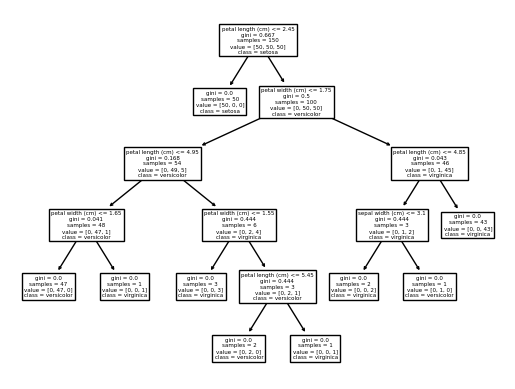

In [23]:
import matplotlib.pyplot as plt

tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig("tree.png", dpi=1200)

In [1]:
# !pip install -U scikit-learn
import lightning as L
from lightning.app.storage import Drive


from sklearn.datasets import load_iris
from sklearn import tree
from joblib import dump, load


class SKLearnTraining(L.LightningWork):
    def __init__(self):
        # we use CloudCompute API to configure the machine-related config
        # create a CPU machine with 10 GB disk size
        super().__init__(cloud_compute=L.CloudCompute("cpu", disk_size=10))

        # cloud persistable storage for model checkpoint
        self.model_storage = Drive("lit://checkpoints")

    def run(self):
        # Step 1
        # Download the dataset
        iris = load_iris()
        X, y = iris.data, iris.target

        # Split the dataset into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        # Step 2
        # Intialize the model
        clf = tree.DecisionTreeClassifier()

        # Step 3
        # Train the model
        clf = clf.fit(X_train, y_train)

        # check accuracy
        print(f"train accuracy: {clf.score(X_train, y_train)}")
        print(f"test accuracy: {clf.score(X_test, y_test)}")

        # Step 4
        # Save the model
        dump(clf, "model.joblib")

        self.model_storage.put("model.joblib")
        print("model trained and saved successfully")

NOTE: Redirects are currently not supported in Windows or MacOs.
